### Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE

### Loading the Datasets

In [3]:
# Load e-commerce fraud data
fraud_df = pd.read_csv('../data/raw/Fraud_Data.csv')

# Load IP to country mapping
ip_country_df = pd.read_csv('../data/raw/IpAddress_to_Country.csv')

# Load credit card data
credit_df = pd.read_csv('../data/raw/creditcard.csv')

### Handling Missing Values

In [4]:
# Check for missing values in creditcard
print(credit_df.isnull().sum())
# Output: No missing values (Time, V1-V28, Amount, Class)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


### Removing Duplicates

In [5]:
# Check and remove duplicates
print(f"Duplicates in creditcard: {credit_df.duplicated().sum()}")
credit_df.drop_duplicates(inplace=True)

Duplicates in creditcard: 1081


### Correcting Data Types

In [7]:
# Ensure numerical types (already float/int in raw data)
credit_df['Time'] = credit_df['Time'].astype(float)
credit_df['Amount'] = credit_df['Amount'].astype(float)
credit_df['Class'] = credit_df['Class'].astype(int)

### Processed DataFrames are saved as:

In [8]:
credit_df.to_csv('../data/processed/cleaned_creditcard.csv', index=False)

### Univariate Analysis: Distributions of Key Variables

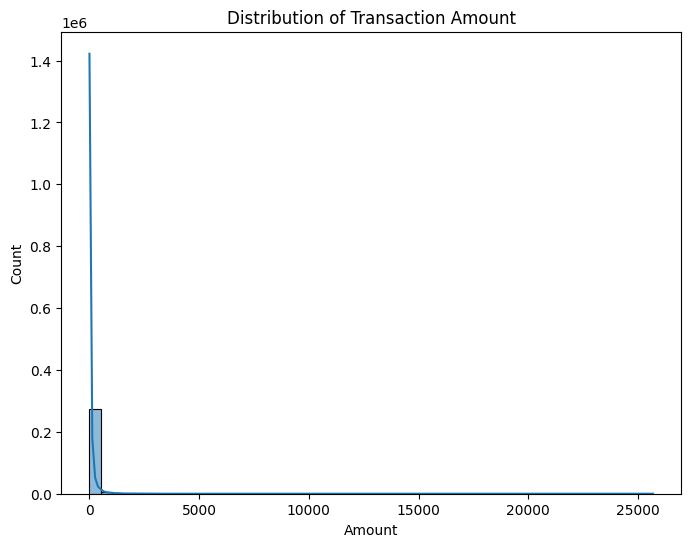

In [9]:
# Distribution of Amount
plt.figure(figsize=(8, 6))
sns.histplot(credit_df['Amount'], kde=True, bins=50)
plt.title('Distribution of Transaction Amount')
plt.savefig('amount_dist.png')
plt.show()
# Insight: Highly skewed, majority < $100, but fraud often in higher amounts (to be confirmed in bivariate).

### Bivariate Analysis: Relationships Between Features and Target

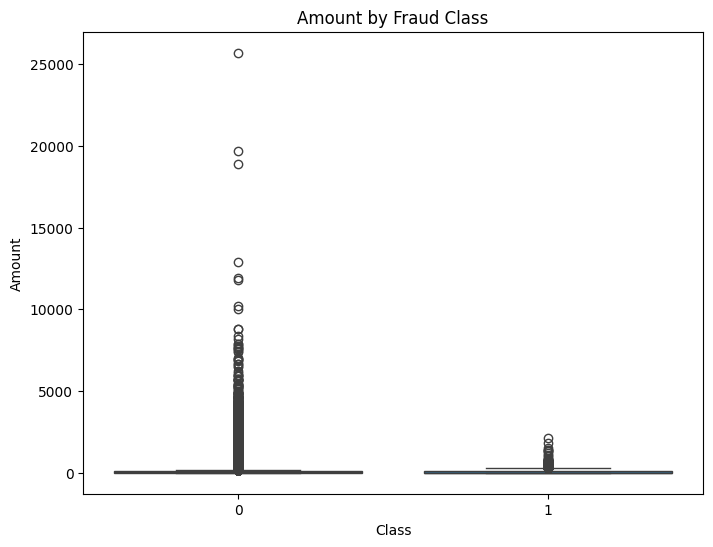

In [10]:
# Amount vs. Class
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=credit_df)
plt.title('Amount by Fraud Class')
plt.savefig('amount_vs_class.png')
plt.show()
# Insight: Fraud transactions have higher variance and medians, but many small frauds exist.

### Correlation heatmap

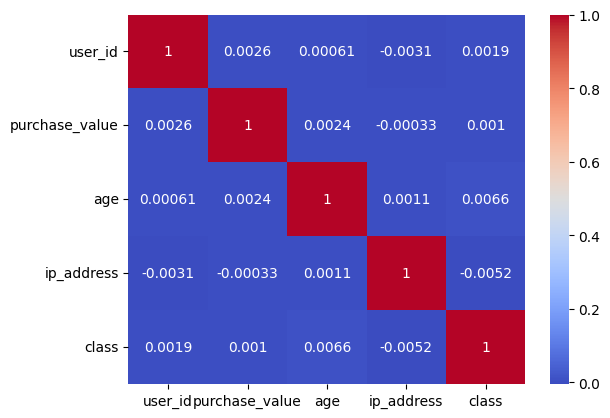

In [11]:
# Numerical features correlation
corr = fraud_df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.savefig('correlation_heatmap.png')
# Insight: Low correlations overall; purchase_value weakly correlates with age (0.1-0.2).

### Class Distribution Analysis: Quantify the Imbalance

Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64


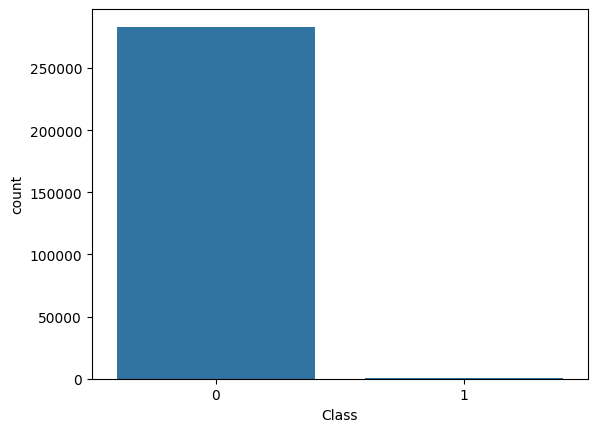

In [12]:
print(credit_df['Class'].value_counts(normalize=True))
# Output example: 0: 99.83%, 1: 0.17% (extremely imbalanced)

sns.countplot(x='Class', data=credit_df)
plt.savefig('class_dist_credit.png')